# 3章の流れ
* 分類タスクのチュートリアル
* MNISTを分類器、モデルの評価手法を学ぶ

##### データの読み込み

In [11]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [8]:
#読み込みができない場合
from sklearn.datasets.base import get_data_home 
print (get_data_home()) 
#ここで表示されたパスに　https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.matを入れる

/Users/nakajimakouhei/scikit_learn_data


ラベルは5.0


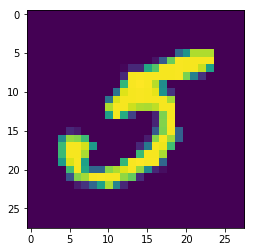

In [15]:
import matplotlib.pyplot as plt

X, y = mnist["data"], mnist["target"]
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28) #画像形式に変換

plt.imshow(some_digit_image)
print("ラベルは{}".format(y[36000]))

In [16]:
#前半6万個を学習データに、後半をテストデータとする
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000] 

In [18]:
#訓練データをシャッフル(データは数字ごとにかたまっているため)
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### 二項分類器の訓練
* 確率的勾配降下法を用いて二値分類
* 5と5以外のクラスに分ける

In [20]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/nakajimakouhei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)